**5. Kaggle: House Prices - Advanced Regression Techniques**

Description: Predict house sale prices using regression models based on feature data.

Business Value: Helps real estate companies and appraisers accurately estimate property values, optimize pricing strategies, and enhance market competitiveness.

Link: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

**Business Framing:**
Understanding the factors that influence home prices is critical for real estate professionals, buyers, and sellers to make informed decisions. This problem provides a data-driven approach to predict house prices, enabling stakeholders to estimate market value with greater accuracy. By leveraging advanced machine learning models, realtors and property investors can better assess property worth, optimizing pricing strategies and negotiation outcomes.



**Problem Statement:**
Given a dataset with 79 features capturing various aspects of residential properties in Ames, Iowa, the goal is to develop a predictive model that accurately estimates the final sale price of homes. This model must utilize the complex interplay of these features to provide robust predictions, addressing the challenge of identifying and interpreting key factors that drive housing prices.

# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

/Users/jerouse/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Load datasets
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

# Checking the loaded data

In [4]:
# Training data

train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Testing Data

test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
# Descriptive Statistics

train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
test_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


# Data Preparation

In [8]:
# Data Preparation
def preprocess_data(df):
    df = df.copy()
    # Handle missing values
    for col in df.columns:
        if df[col].dtype == "object":
            df[col] = df[col].fillna("None")
        else:
            df[col] = df[col].fillna(0)

    # Encode categorical features
    label_encoders = {}
    for col in df.select_dtypes(include="object").columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

    return df, label_encoders

train_data, _ = preprocess_data(train_data)
test_data, _ = preprocess_data(test_data)

# Exploratory Data Analysis

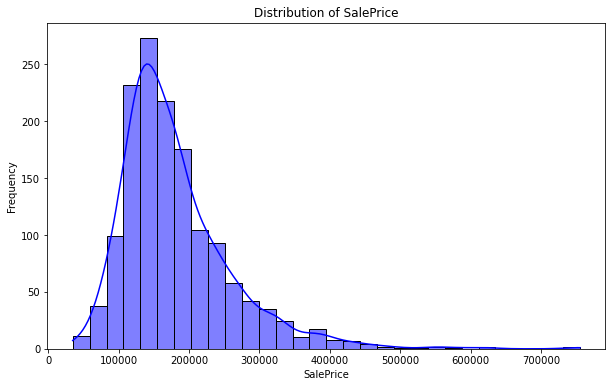

In [9]:
# Distribution of target variable
plt.figure(figsize=(10, 6))
sns.histplot(train_data["SalePrice"], kde=True, bins=30, color="blue")
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()

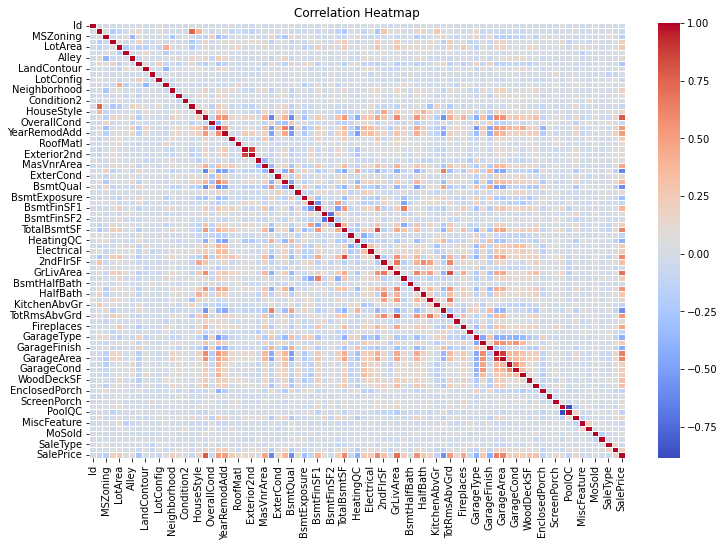

In [10]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

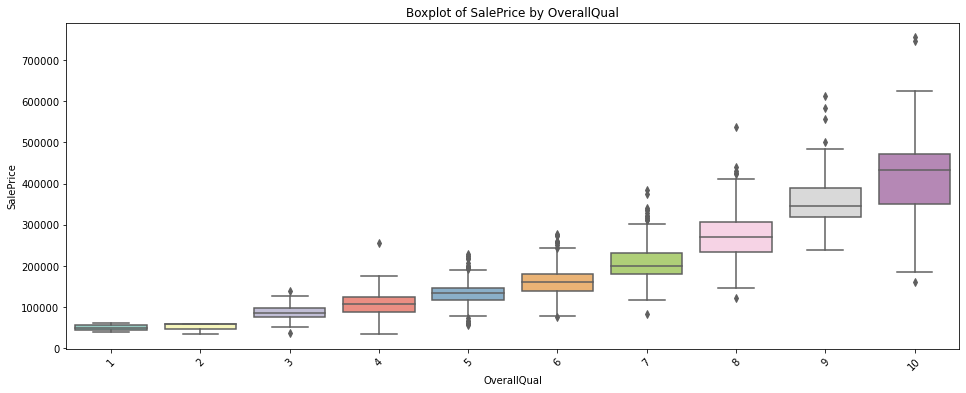

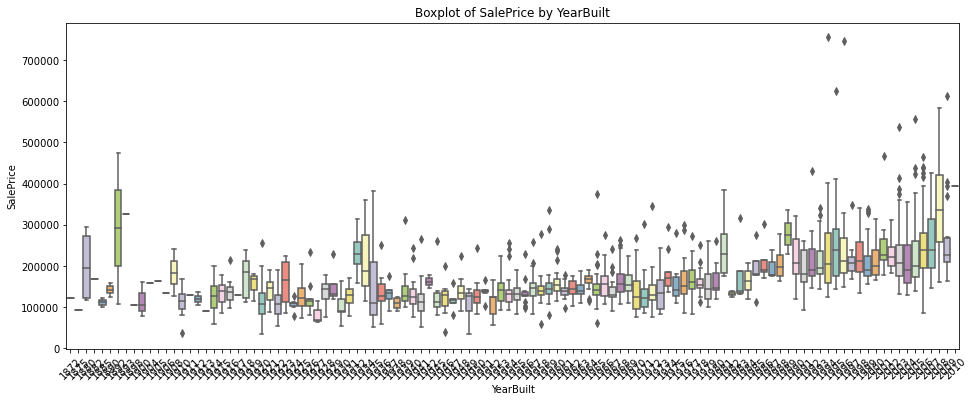

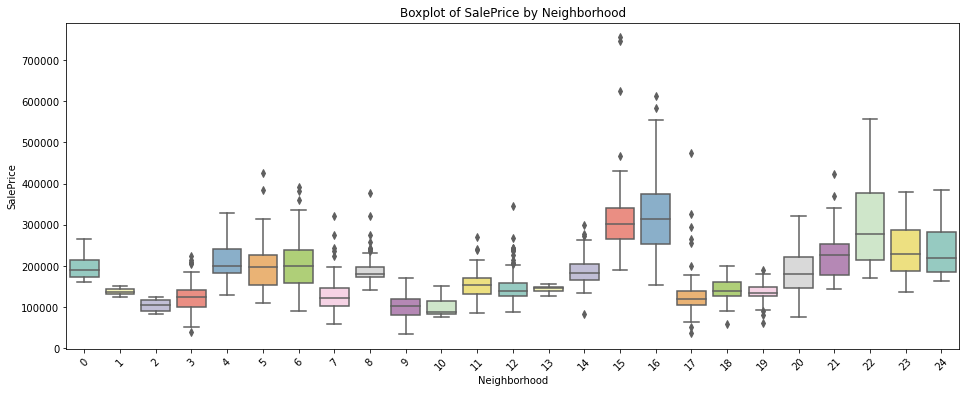

In [11]:
# Box plots for selected features
selected_features = ["OverallQual", "YearBuilt", "Neighborhood"]
for feature in selected_features:
    plt.figure(figsize=(16, 6))
    sns.boxplot(x=feature, y="SalePrice", data=train_data, palette="Set3")
    plt.title(f"Boxplot of SalePrice by {feature}")
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.xticks(rotation=45)
    plt.show()

In [12]:
# Feature importance visualization
def plot_feature_importance(model, features):
    importance = model.feature_importances_
    feature_df = pd.DataFrame({"Feature": features, "Importance": importance})
    feature_df = feature_df.sort_values(by="Importance", ascending=False).head(20)
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Importance", y="Feature", data=feature_df, palette="viridis")
    plt.title("Top 20 Feature Importances")
    plt.show()

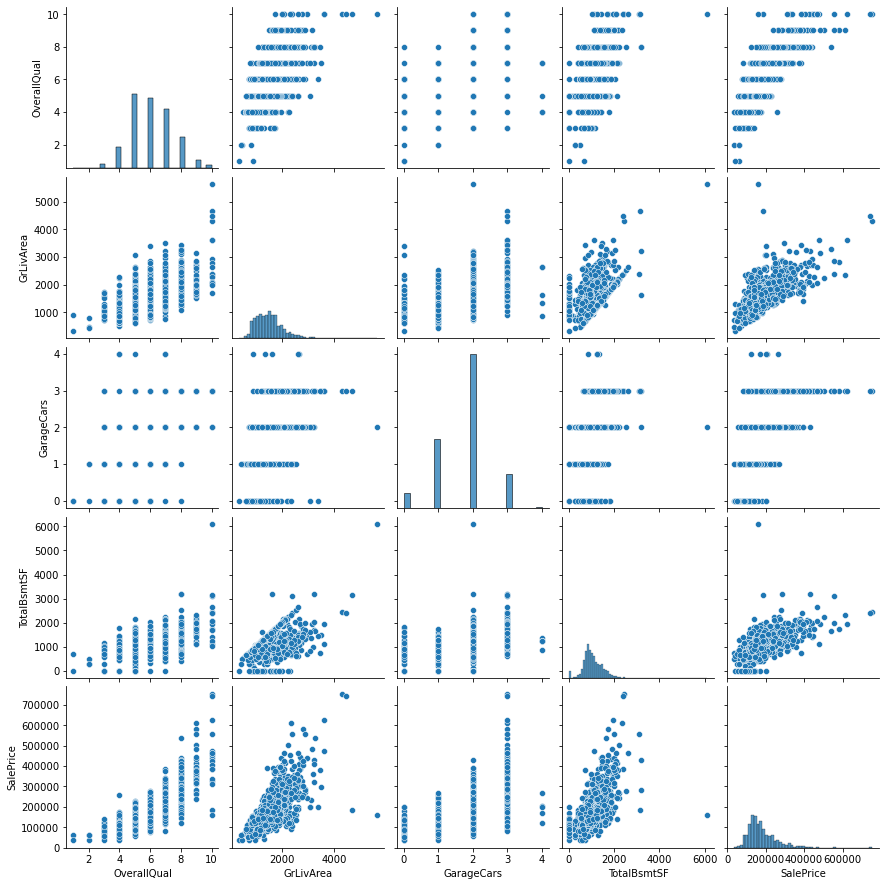

In [13]:
# Pairplot of selected features
selected_features = ["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "SalePrice"]
sns.pairplot(train_data[selected_features])
plt.show()

# Model Training

In [14]:
# Separate features and target
X = train_data.drop(columns=["SalePrice", "Id"])
y = np.log1p(train_data["SalePrice"])

# Train-test split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Random Forest
rf = RandomForestRegressor(random_state=42)
rf_params = {
    "n_estimators": [100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5],
}
rf_grid = GridSearchCV(rf, rf_params, cv=3, scoring="neg_mean_squared_error")
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

In [16]:
# Gradient Boosting
gbr = GradientBoostingRegressor(random_state=42)
gbr_params = {
    "n_estimators": [100, 200],
    "learning_rate": [0.05, 0.1],
    "max_depth": [3, 5, 10],
}
gbr_grid = GridSearchCV(gbr, gbr_params, cv=3, scoring="neg_mean_squared_error")
gbr_grid.fit(X_train, y_train)
best_gbr = gbr_grid.best_estimator_

# Model Evaluation

In [17]:
def evaluate_model(model, X_valid, y_valid):
    preds = model.predict(X_valid)
    rmse = np.sqrt(mean_squared_error(y_valid, preds))
    return rmse

rf_rmse = evaluate_model(best_rf, X_valid, y_valid)
gbr_rmse = evaluate_model(best_gbr, X_valid, y_valid)

print(f"Random Forest RMSE: {rf_rmse}")
print(f"Gradient Boosting RMSE: {gbr_rmse}")


Random Forest RMSE: 0.14630550130065872
Gradient Boosting RMSE: 0.13881139523669242


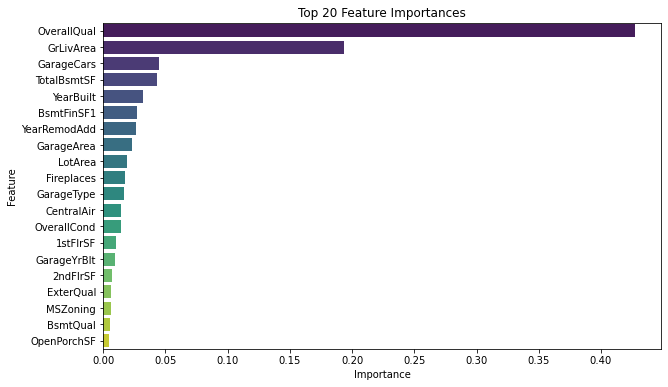

In [18]:
# Feature importance visualization for the best model
if gbr_rmse < rf_rmse:
    plot_feature_importance(best_gbr, X.columns)
else:
    plot_feature_importance(best_rf, X.columns)

In [19]:
# Make predictions on the test set
X_test = test_data.drop(columns=["Id"])
rf_preds = np.expm1(best_rf.predict(X_test))
gbr_preds = np.expm1(best_gbr.predict(X_test))

In [20]:
# Choose the best model's predictions
test_data["SalePrice"] = gbr_preds if gbr_rmse < rf_rmse else rf_preds

# Save submission file
submission = test_data[["Id", "SalePrice"]]
submission.to_csv("submission.csv", index=False)

# The best-performing model is Random Forest based on RMSE of 0.146, predicts house prices for the test set. The results are log-transformed to ensure consistent evaluation metrics, and feature importance highlights key factors influencing house prices.